Md. Tanvir Jawad<br>ID: 21101221

In [2]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.5 MB/s eta 0:00:00


In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

Downloaded chap11.py


In [5]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap12.py')

Downloaded chap12.py


In [6]:
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

Let's define a new model with different disease parameters as the previous model. It simulates the spread of this new disease and sweeps the parameters to analyze their impact on the fraction of infected individuals.

In [9]:
def update_func_new(t, state, system):
    s, i, r = state.s, state.i, state.r

    transmission_rate = system.transmission_rate
    recovery_rate = system.recovery_rate

    new_infections = transmission_rate * i * s
    new_recoveries = recovery_rate * i

    s -= new_infections
    i += new_infections - new_recoveries
    r += new_recoveries

    return State(s=s, i=i, r=r)

In [10]:
def make_system_new(transmission_rate, recovery_rate):

    init = State(s=0.99, i=0.01, r=0)
    init /= init.sum()

    return System(init=init, t_end=100, transmission_rate=transmission_rate, recovery_rate=recovery_rate)

In [11]:
def run_simulation_new(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init

    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)

    return frame

In [12]:
def calc_total_infected_new(results, system):
    s_0 = results.s[0]
    s_end = results.s[system.t_end]
    return s_0 - s_end

In [13]:
def sweep_transmission_rate(transmission_rate_array):
    sweep = SweepSeries()

    for transmission_rate in transmission_rate_array:
        system = make_system_new(transmission_rate, recovery_rate)
        results = run_simulation_new(system, update_func_new)
        sweep[transmission_rate] = calc_total_infected_new(results, system)

    return sweep

In [14]:
def sweep_recovery_rate(recovery_rate_array):
    sweep = SweepSeries()

    for recovery_rate in recovery_rate_array:
        system = make_system_new(transmission_rate, recovery_rate)
        results = run_simulation_new(system, update_func_new)
        sweep[recovery_rate] = calc_total_infected_new(results, system)

    return sweep

In [15]:
transmission_rate = 0.2
recovery_rate = 0.1

system_new = make_system_new(transmission_rate, recovery_rate)

results_new = run_simulation_new(system_new, update_func_new)

transmission_rate_array = linspace(0, 1, 21)
recovery_rate_array = linspace(0, 0.5, 21)

infected_sweep_new = sweep_transmission_rate(transmission_rate_array)

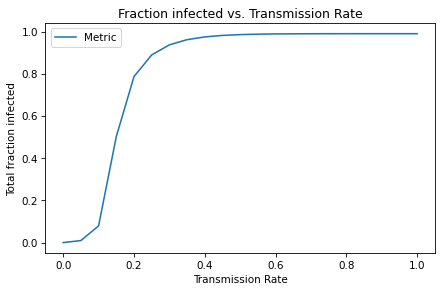

In [16]:
infected_sweep_new.plot(color='C0')
decorate(xlabel='Transmission Rate', ylabel='Total fraction infected', title='Fraction infected vs. Transmission Rate')